In [160]:
import cv2
from matplotlib import pyplot as plt
image_file = "/MLOCR/data/page_01.jpg"
image_file2 = "/MLOCR/data/chew.jpg"
image_file3 = "/MLOCR/data/chair.jpg"
image_file4 = "/MLOCR/data/pack.jpg"
img = cv2.imread(image_file)
img2 = cv2.imread(image_file2)
img3 = cv2.imread(image_file3)
img4 = cv2.imread(image_file4)

In [161]:
def display(im_path):

    dpi = 125
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [162]:
inverted_img = cv2.bitwise_not(img4)
cv2.imwrite("/MLOCR/temp/inverted_pack.jpg", inverted_img)

True

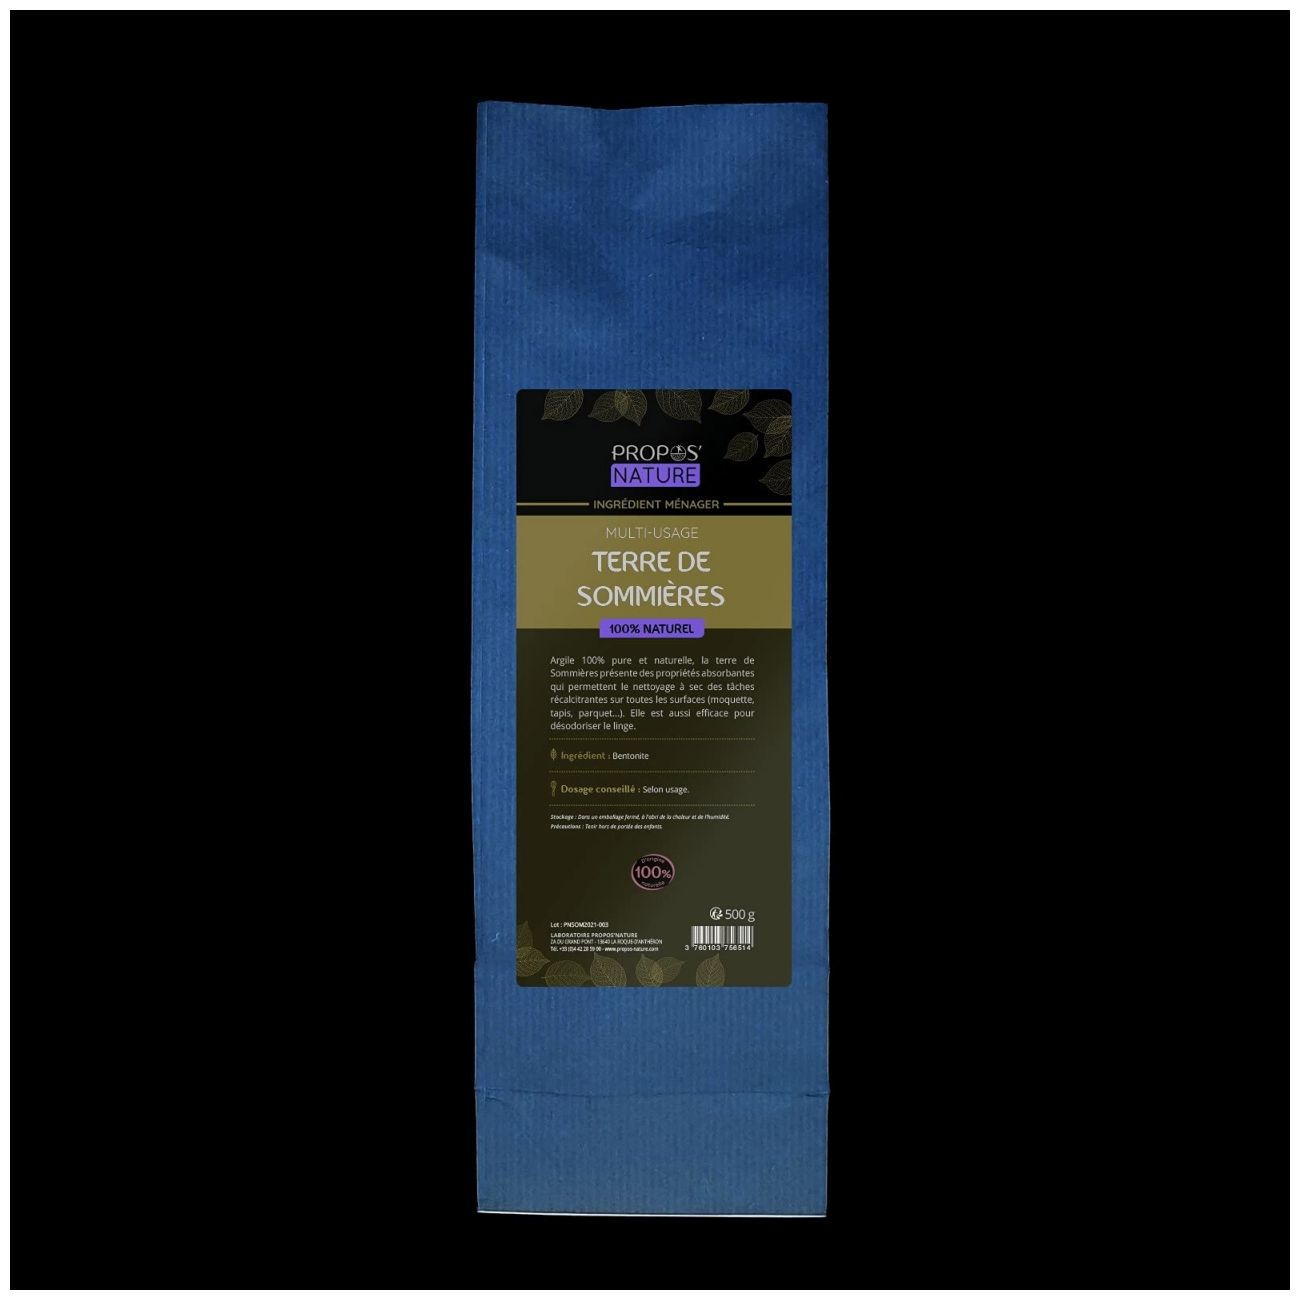

In [164]:
display("/MLOCR/temp/inverted_pack.jpg")

In [165]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [166]:
gray_img = grayscale(img4)
cv2.imwrite("/MLOCR/temp/graypack.jpg", gray_img)

True

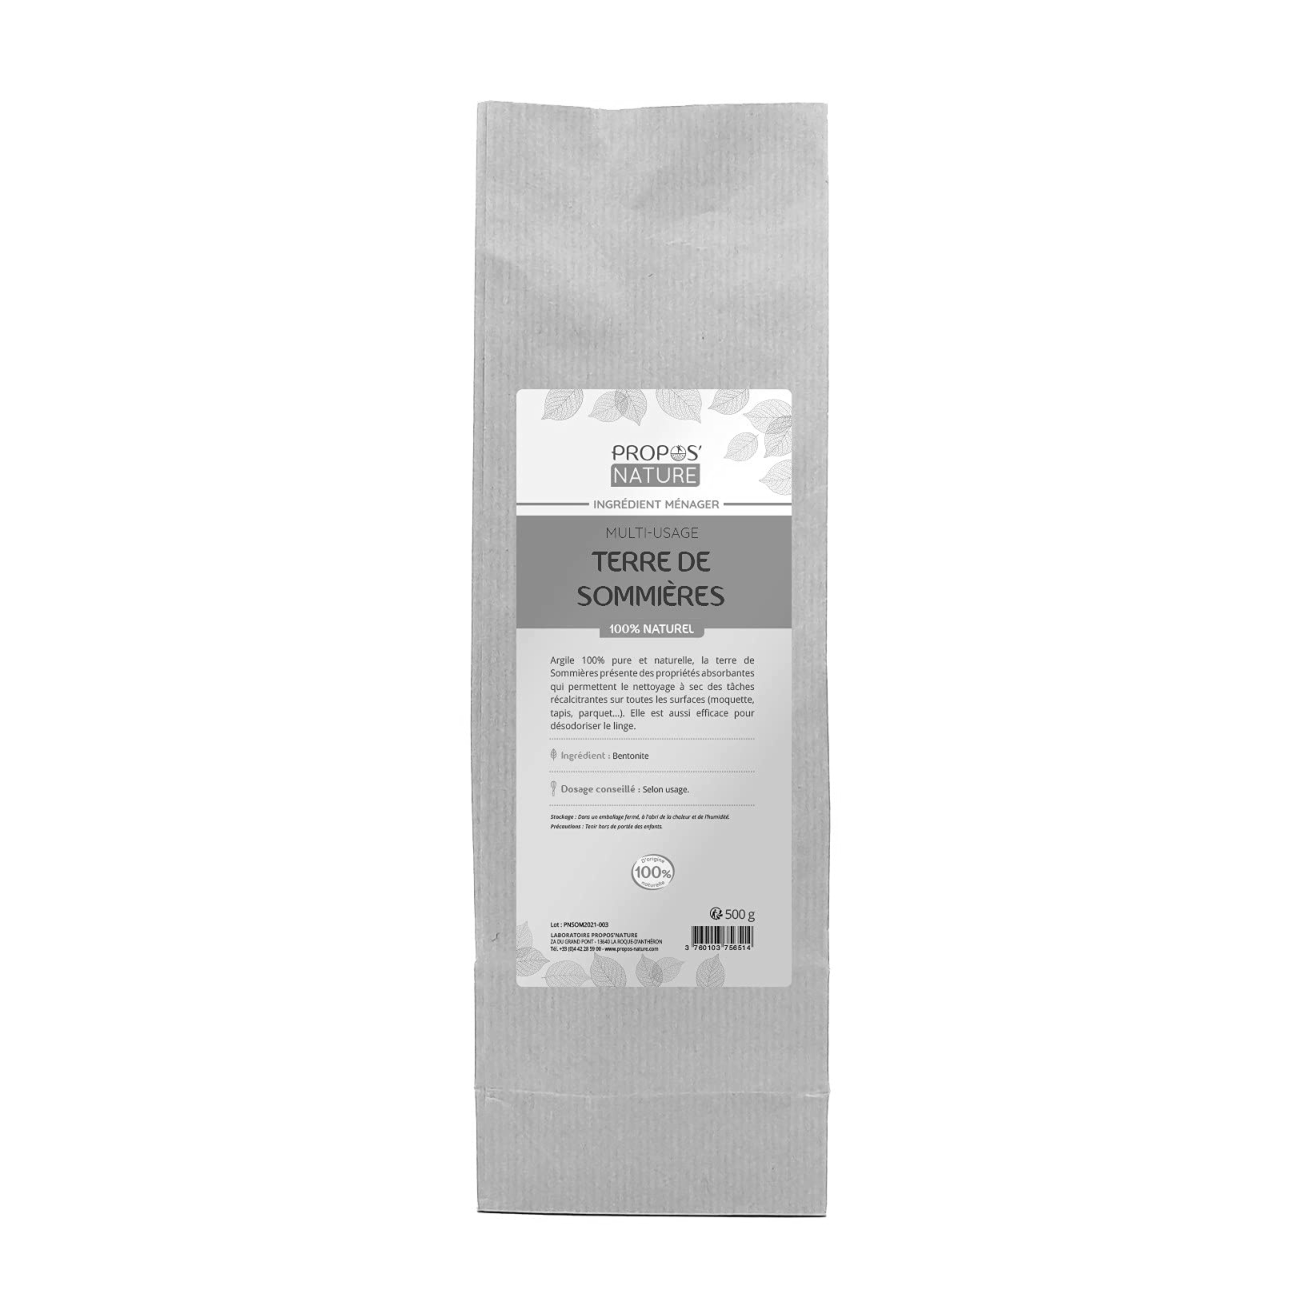

In [167]:
display("/MLOCR/temp/graypack.jpg")

In [169]:
 thresh, im_bw = cv2.threshold(gray_img, 200, 230, cv2.THRESH_BINARY)
 cv2.imwrite("/MLOCR/temp/bwpack.jpg", im_bw)

True

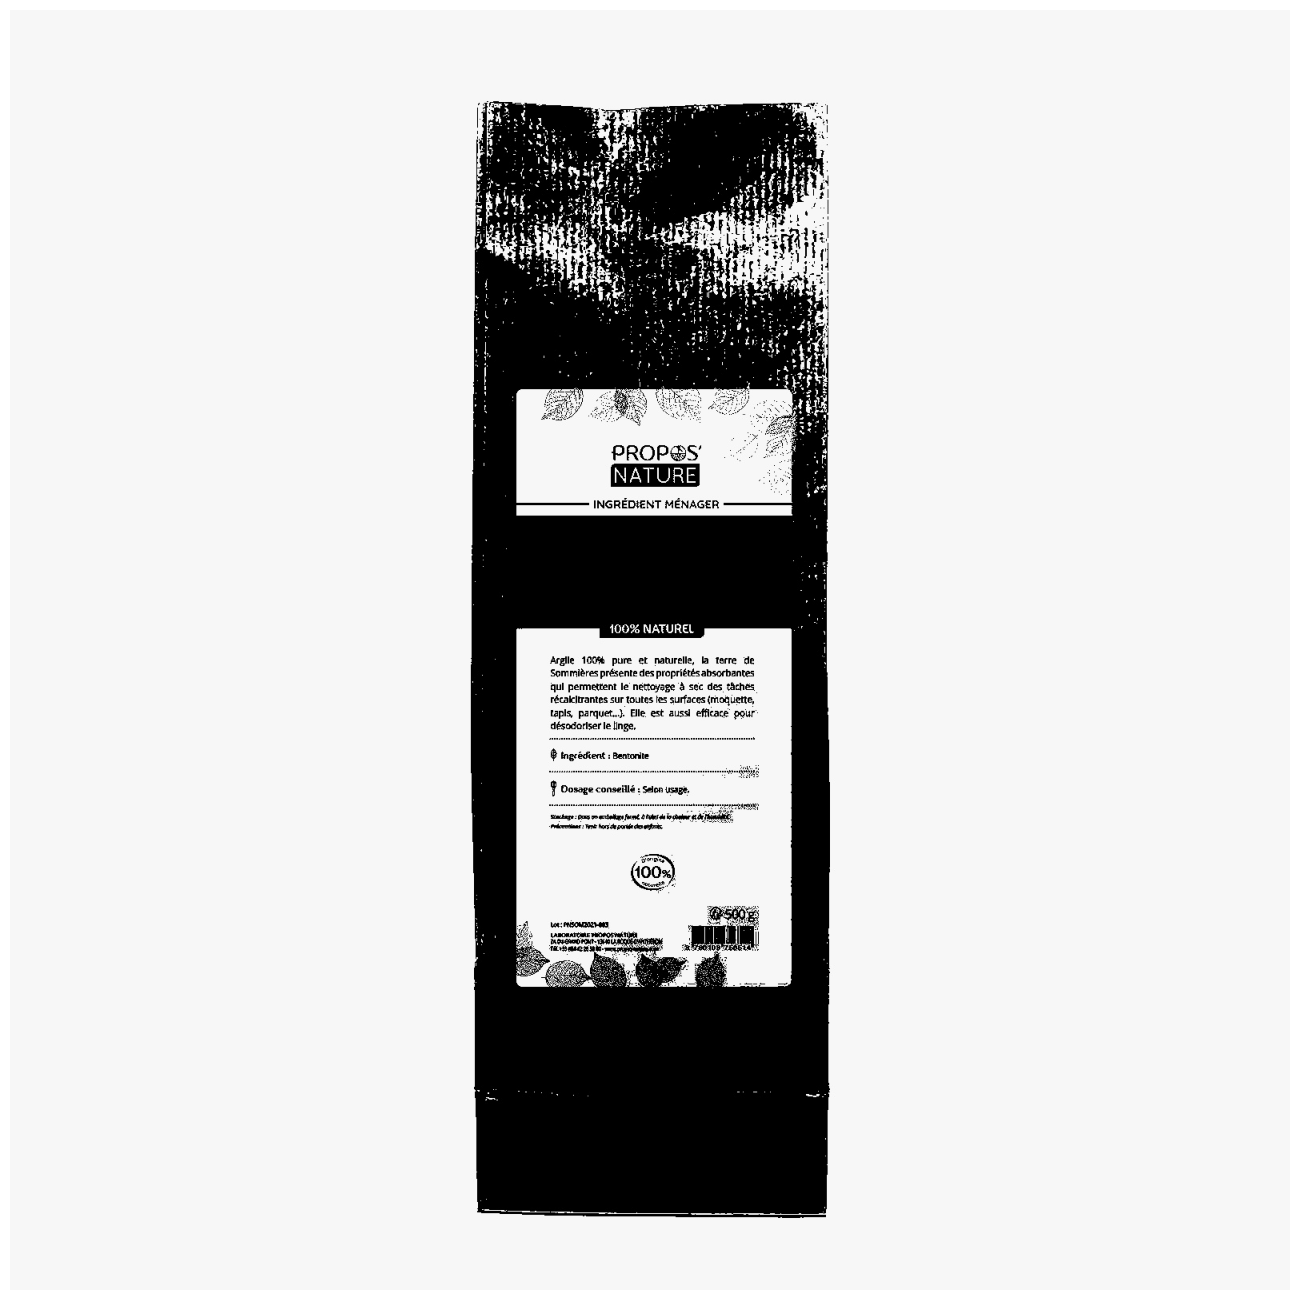

In [170]:
display("/MLOCR/temp/bwpack.jpg")

In [183]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((3, 3),np.uint8)
    # image = cv2.dilate(image,kernel,iterations=1)
    # kernel = np.ones((1,1),np.uint8)
    # image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image = cv2.medianBlur(image,3)
    return (image)

In [184]:
no_noise = noise_removal(im_bw)
cv2.imwrite("/MLOCR/temp/noisepack.jpg", no_noise)

True

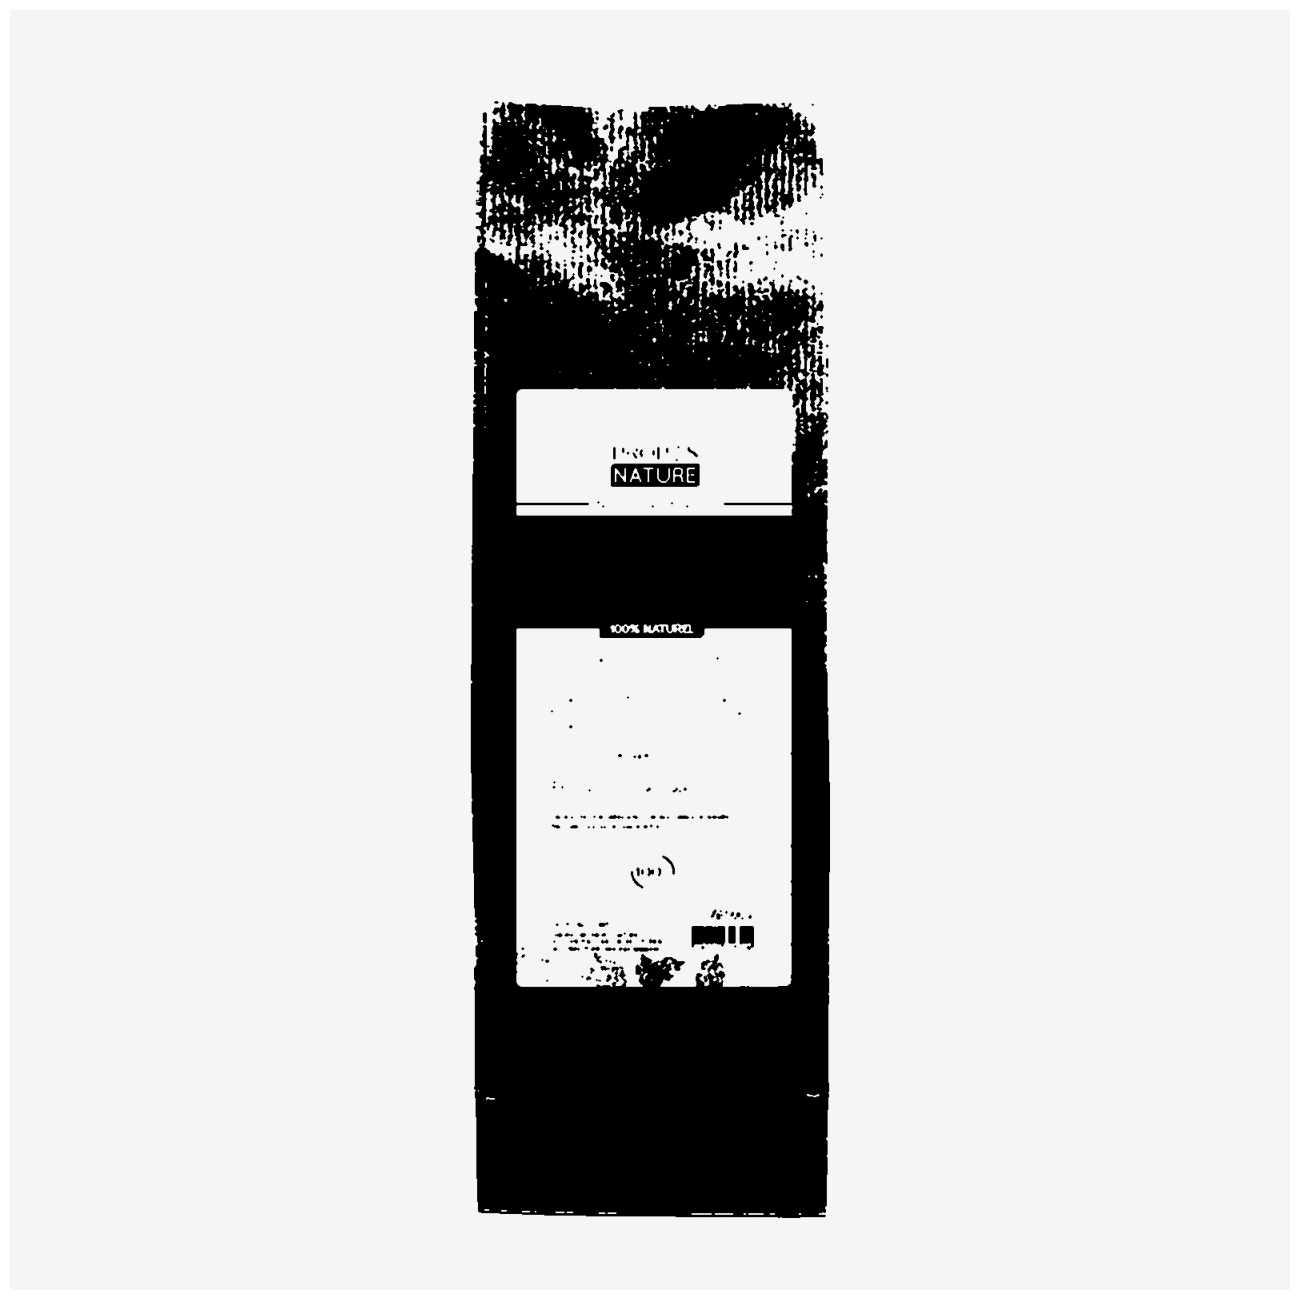

In [185]:
display("/MLOCR/temp/noisepack.jpg")

In [153]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [154]:
dilated_image = thick_font(gray_img)
cv2.imwrite("/MLOCR/temp/dilate_chair.jpg",dilated_image)

True

In [ ]:
display("/MLOCR/temp/dilate_chair.jpg")

In [174]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [175]:
eroded_image = thin_font(no_noise)
cv2.imwrite("/MLOCR/temp/erode_pack.jpg", eroded_image)

True

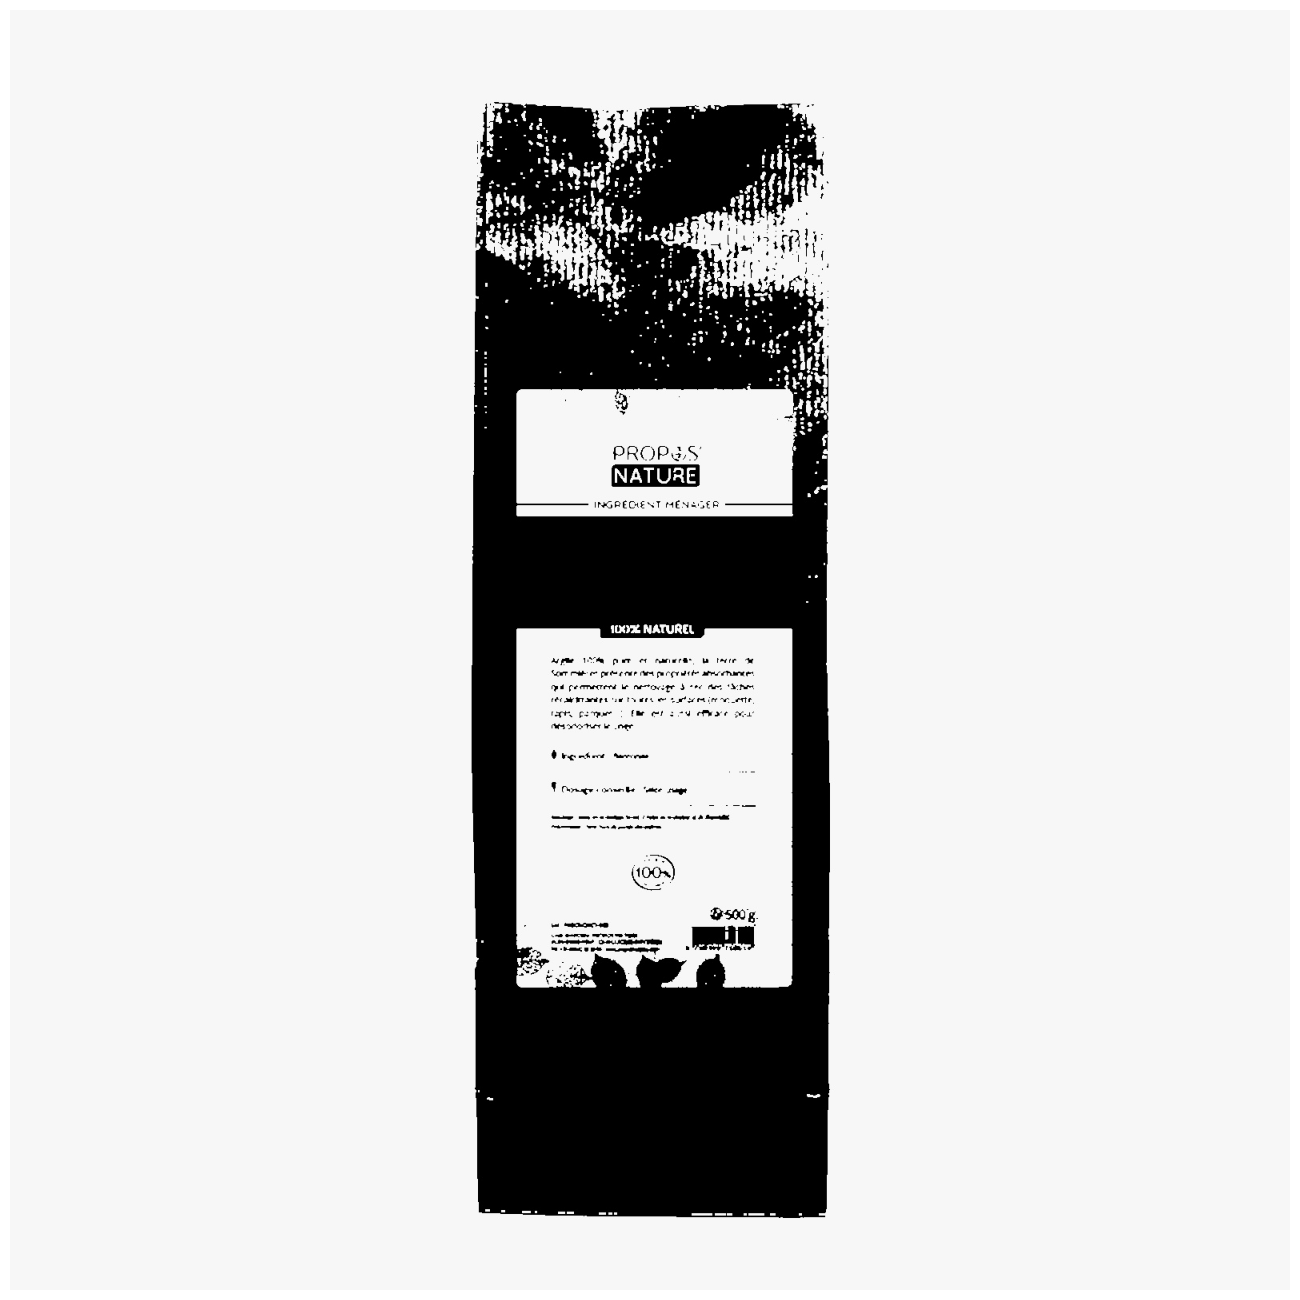

In [176]:
display("/MLOCR/temp/erode_pack.jpg")